In [1]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
model = load_model(r'C:\Users\tobby\Documents\russian_disinformation\anger_classification_duplicated_resnet50_300_epoch\anger_duplicated_resnet50.model')

In [3]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [4]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
# matplotlib.use("Agg")

# import the necessary packages
import time
import pandas as pd
import seaborn as sn
import keras
import os
import cv2
import pickle
import random
import argparse
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from keras.losses import logcosh, binary_crossentropy
from keras.activations import relu, elu, sigmoid
from keras.preprocessing.image import ImageDataGenerator
# import matplotlib
# matplotlib.use("Agg")

In [5]:
# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
EPOCHS = 200
INIT_LR = 1e-2
BS = 32
IMAGE_DIMS = (224, 224, 3)

In [6]:
from imutils import paths

imagePaths = sorted(list(paths.list_images("anger_classification_minority_duplicated")))
random.seed(42)
random.shuffle(imagePaths)
imagePaths

['anger_classification_minority_duplicated\\anger\\anger_127.jpg',
 'anger_classification_minority_duplicated\\non_anger\\non_anger_266.jpg',
 'anger_classification_minority_duplicated\\non_anger\\non_anger_291.jpg',
 'anger_classification_minority_duplicated\\anger\\anger_416 - Copy.jpg',
 'anger_classification_minority_duplicated\\non_anger\\non_anger_761.jpg',
 'anger_classification_minority_duplicated\\non_anger\\non_anger_2000.jpg',
 'anger_classification_minority_duplicated\\non_anger\\non_anger_451.jpg',
 'anger_classification_minority_duplicated\\non_anger\\non_anger_1167.jpg',
 'anger_classification_minority_duplicated\\anger\\anger_166 - Copy (2).jpg',
 'anger_classification_minority_duplicated\\anger\\anger_369 - Copy (2).jpg',
 'anger_classification_minority_duplicated\\non_anger\\non_anger_816.jpg',
 'anger_classification_minority_duplicated\\anger\\anger_299 - Copy (2).jpg',
 'anger_classification_minority_duplicated\\anger\\anger_335 - Copy.jpg',
 'anger_classification_m

In [7]:
from keras.preprocessing.image import img_to_array

data = []
labels = []

# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [8]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {:.2f}MB".format(
    data.nbytes / (1024 * 1000.0)))

[INFO] data matrix: 5247.31MB


In [9]:
from sklearn.preprocessing import LabelBinarizer

# binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
from sklearn.model_selection import train_test_split

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.2, random_state=42)

In [11]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [12]:
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [13]:
# train the network
print("[INFO] training network...")
H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)#, class_weight={0:3, 1:1})

# save the model to disk
print("[INFO] serializing network...")
model.save("anger_imbalanced.model")

[INFO] training network...
Epoch 1/200
111/111 [==============================] - 63s 564ms/step - loss: 0.0998 - accuracy: 0.9570 - val_loss: 0.7135 - val_accuracy: 0.8567
Epoch 2/200
111/111 [==============================] - 47s 420ms/step - loss: 0.0988 - accuracy: 0.9539 - val_loss: 0.7527 - val_accuracy: 0.8600
Epoch 3/200
111/111 [==============================] - 47s 420ms/step - loss: 0.0960 - accuracy: 0.9567 - val_loss: 0.8428 - val_accuracy: 0.8847
Epoch 4/200
111/111 [==============================] - 47s 422ms/step - loss: 0.0993 - accuracy: 0.9552 - val_loss: 0.7540 - val_accuracy: 0.8555
Epoch 5/200
111/111 [==============================] - 47s 420ms/step - loss: 0.0932 - accuracy: 0.9577 - val_loss: 0.7617 - val_accuracy: 0.8667
Epoch 6/200
111/111 [==============================] - 47s 423ms/step - loss: 0.0953 - accuracy: 0.9576 - val_loss: 0.9006 - val_accuracy: 0.8589
Epoch 7/200
111/111 [==============================] - 47s 421ms/step - loss: 0.1012 - accuracy: 

111/111 [==============================] - 46s 418ms/step - loss: 0.0943 - accuracy: 0.9579 - val_loss: 0.6798 - val_accuracy: 0.8712
Epoch 57/200
111/111 [==============================] - 46s 418ms/step - loss: 0.0835 - accuracy: 0.9604 - val_loss: 0.7666 - val_accuracy: 0.8455
Epoch 58/200
111/111 [==============================] - 46s 417ms/step - loss: 0.0954 - accuracy: 0.9557 - val_loss: 0.6462 - val_accuracy: 0.8779
Epoch 59/200
111/111 [==============================] - 46s 418ms/step - loss: 0.0926 - accuracy: 0.9627 - val_loss: 0.8144 - val_accuracy: 0.8555
Epoch 60/200
111/111 [==============================] - 47s 420ms/step - loss: 0.0954 - accuracy: 0.9578 - val_loss: 0.7363 - val_accuracy: 0.8813
Epoch 61/200
111/111 [==============================] - 46s 418ms/step - loss: 0.0981 - accuracy: 0.9545 - val_loss: 0.6455 - val_accuracy: 0.8824
Epoch 62/200
111/111 [==============================] - 46s 417ms/step - loss: 0.0924 - accuracy: 0.9588 - val_loss: 0.6950 - val_a

Epoch 112/200
111/111 [==============================] - 47s 421ms/step - loss: 0.0886 - accuracy: 0.9604 - val_loss: 0.8431 - val_accuracy: 0.8712
Epoch 113/200
111/111 [==============================] - 47s 421ms/step - loss: 0.0890 - accuracy: 0.9590 - val_loss: 0.8154 - val_accuracy: 0.8723
Epoch 114/200
111/111 [==============================] - 47s 421ms/step - loss: 0.0920 - accuracy: 0.9607 - val_loss: 0.7905 - val_accuracy: 0.8746
Epoch 115/200
111/111 [==============================] - 47s 421ms/step - loss: 0.0928 - accuracy: 0.9607 - val_loss: 0.8203 - val_accuracy: 0.8723
Epoch 116/200
111/111 [==============================] - 47s 421ms/step - loss: 0.0923 - accuracy: 0.9556 - val_loss: 0.9270 - val_accuracy: 0.8511
Epoch 117/200
111/111 [==============================] - 47s 421ms/step - loss: 0.0885 - accuracy: 0.9604 - val_loss: 0.6866 - val_accuracy: 0.8891
Epoch 118/200
111/111 [==============================] - 47s 421ms/step - loss: 0.0885 - accuracy: 0.9615 - val_

111/111 [==============================] - 47s 425ms/step - loss: 0.0872 - accuracy: 0.9600 - val_loss: 0.8135 - val_accuracy: 0.8735
Epoch 168/200
111/111 [==============================] - 47s 425ms/step - loss: 0.0825 - accuracy: 0.9620 - val_loss: 0.7760 - val_accuracy: 0.8847
Epoch 169/200
111/111 [==============================] - 47s 424ms/step - loss: 0.0832 - accuracy: 0.9593 - val_loss: 0.7263 - val_accuracy: 0.8903
Epoch 170/200
111/111 [==============================] - 48s 428ms/step - loss: 0.0881 - accuracy: 0.9604 - val_loss: 0.7457 - val_accuracy: 0.8936
Epoch 171/200
111/111 [==============================] - 47s 426ms/step - loss: 0.0914 - accuracy: 0.9561 - val_loss: 0.8208 - val_accuracy: 0.8712
Epoch 172/200
111/111 [==============================] - 47s 423ms/step - loss: 0.0829 - accuracy: 0.9671 - val_loss: 0.7341 - val_accuracy: 0.8712
Epoch 173/200
111/111 [==============================] - 47s 425ms/step - loss: 0.0880 - accuracy: 0.9584 - val_loss: 0.7601 -

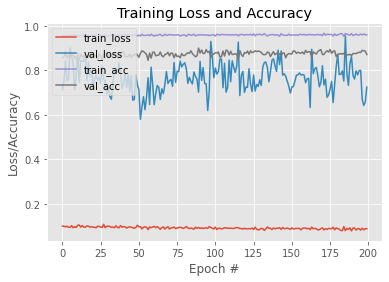

<Figure size 432x288 with 0 Axes>

In [14]:
plt.style.use("ggplot")
%matplotlib inline
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()
plt.savefig("anger_class_weights_plot_imbalanced.png")

In [15]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
 

# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs, axis=1)

Classification report: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

       anger       0.84      0.92      0.88       448
   non-anger       0.91      0.82      0.86       445

    accuracy                           0.87       893
   macro avg       0.87      0.87      0.87       893
weighted avg       0.87      0.87      0.87       893

---------------------------------------------------------- 
Accuracy score: 0.871221
Precision score: 0.910448
Recall score: 0.822472
F1 score: 0.864227
---------------------------------------------------------- 
Confusion matrix: 
[[412  36]
 [ 79 366]]


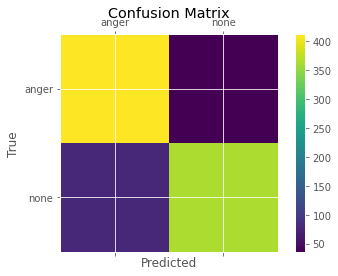

[[412  36]
 [ 79 366]]


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

classif_report = classification_report(testY, yhat_classes, target_names=['anger', 'non-anger'])
print('Classification report: ')
print('---------------------------------------------------------- ')
print(classif_report)

print('---------------------------------------------------------- ')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testY, yhat_classes)
print('Accuracy score: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testY, yhat_classes)
print('Precision score: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testY, yhat_classes)
print('Recall score: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, yhat_classes)
print('F1 score: %f' % f1)
print('---------------------------------------------------------- ')

# confusion matrix
labels = ['anger', 'none']
matrix = confusion_matrix(testY, yhat_classes)
print('Confusion matrix: ')
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_anger_imbalanced.png')
plt.show()
print(matrix)